In [1]:
import http.client
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

NFT Tranfers in February 2023

In [107]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload0 = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {ascending: Block_Date}\n      where: {Block: {Date: {since: \"2023-02-01\", till: \"2023-03-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Block {\n        Date\n      }\n      count\n    }\n  }\n}\n",
   "variables": "{}"
})
headers = {
   'Content-Type': 'application/json',
   'X-API-KEY': 'BQYdO11cbRp3kwtJsrLSTOHnuapbJL48'
}
conn.request("POST", "/graphql", payload0, headers)
res0 = conn.getresponse()
data0 = res0.read()
response0= json.loads(data0.decode("utf-8"))
print(response0)

{'data': {'EVM': {'Transfers': [{'Block': {'Date': '2023-02-01'}, 'count': '276855'}, {'Block': {'Date': '2023-02-02'}, 'count': '234185'}, {'Block': {'Date': '2023-02-03'}, 'count': '288370'}, {'Block': {'Date': '2023-02-04'}, 'count': '287435'}, {'Block': {'Date': '2023-02-05'}, 'count': '264605'}, {'Block': {'Date': '2023-02-06'}, 'count': '229436'}, {'Block': {'Date': '2023-02-07'}, 'count': '189348'}, {'Block': {'Date': '2023-02-08'}, 'count': '215485'}, {'Block': {'Date': '2023-02-09'}, 'count': '248798'}, {'Block': {'Date': '2023-02-10'}, 'count': '306768'}, {'Block': {'Date': '2023-02-11'}, 'count': '387566'}, {'Block': {'Date': '2023-02-12'}, 'count': '376424'}, {'Block': {'Date': '2023-02-13'}, 'count': '333440'}, {'Block': {'Date': '2023-02-14'}, 'count': '246071'}, {'Block': {'Date': '2023-02-15'}, 'count': '246133'}, {'Block': {'Date': '2023-02-16'}, 'count': '219234'}, {'Block': {'Date': '2023-02-17'}, 'count': '287262'}, {'Block': {'Date': '2023-02-18'}, 'count': '279317

In [109]:
dt0= response0['data']['EVM']['Transfers']
df_nft_feb = pd.json_normalize(dt0)
df_nft_feb.head(5)

,count,Block.Date
0,276855,2023-02-01
1,234185,2023-02-02
2,288370,2023-02-03
3,287435,2023-02-04
4,264605,2023-02-05


In [111]:
df_nft_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   count       29 non-null     object
 1   Block.Date  29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes


In [ ]:
dataframe['count'] =  pd.to_numeric(dataframe['count'])
dataframe['Block.Date'] = pd.to_datetime(dataframe['Block.Date'])
dataframe['Block.Date'] = dataframe['Block.Date'].dt.day
dataframe.info()

NFT Transfers During Regulators packed period (September 2023)

In [30]:

conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      orderBy: {ascending: Block_Date}\n      where: {Block: {Date: {since: \"2023-9-01\", till: \"2023-10-01\"}}, Transfer: {Currency: {Fungible: false}}}\n    ) {\n      Block {\n        Date\n      }\n      count\n    }\n  }\n}\n",
   "variables": "{}"
})
headers = {
   'Content-Type': 'application/json',
   'X-API-KEY': 'BQYdO11cbRp3kwtJsrLSTOHnuapbJL48'
}
conn.request("POST", "/graphql", payload, headers)
res = conn.getresponse()
data = res.read()
response= json.loads(data.decode("utf-8"))
print(response)


{'data': {'EVM': {'Transfers': [{'Block': {'Date': '2023-09-01'}, 'count': '145637'}, {'Block': {'Date': '2023-09-02'}, 'count': '104272'}, {'Block': {'Date': '2023-09-03'}, 'count': '93897'}, {'Block': {'Date': '2023-09-04'}, 'count': '125071'}, {'Block': {'Date': '2023-09-05'}, 'count': '160966'}, {'Block': {'Date': '2023-09-06'}, 'count': '161740'}, {'Block': {'Date': '2023-09-07'}, 'count': '141062'}, {'Block': {'Date': '2023-09-08'}, 'count': '184425'}, {'Block': {'Date': '2023-09-09'}, 'count': '123643'}, {'Block': {'Date': '2023-09-10'}, 'count': '161540'}, {'Block': {'Date': '2023-09-11'}, 'count': '131652'}, {'Block': {'Date': '2023-09-12'}, 'count': '105835'}, {'Block': {'Date': '2023-09-13'}, 'count': '153006'}, {'Block': {'Date': '2023-09-14'}, 'count': '196569'}, {'Block': {'Date': '2023-09-15'}, 'count': '120837'}, {'Block': {'Date': '2023-09-16'}, 'count': '132694'}, {'Block': {'Date': '2023-09-17'}, 'count': '139284'}, {'Block': {'Date': '2023-09-18'}, 'count': '102830'

In [33]:
data_table= response['data']['EVM']['Transfers']
dataframe = pd.json_normalize(data_table)
dataframe.head(5)

,count,Block.Date
0,145637,2023-09-01
1,104272,2023-09-02
2,93897,2023-09-03
3,125071,2023-09-04
4,160966,2023-09-05


In [46]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   count       31 non-null     object
 1   Block.Date  31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [63]:
dataframe['count'] =  pd.to_numeric(dataframe['count'])
dataframe['Block.Date'] = pd.to_datetime(dataframe['Block.Date'])
dataframe['Block.Date'] = dataframe['Block.Date'].dt.day
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   count       31 non-null     int64
 1   Block.Date  31 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


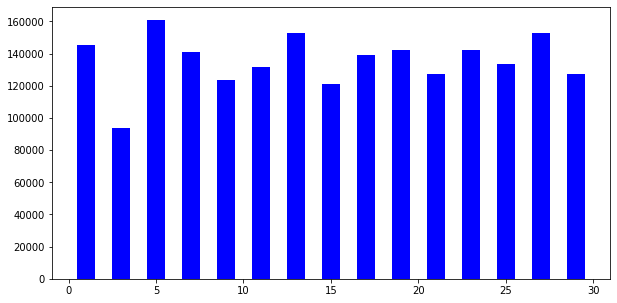

In [65]:
plt.figure(figsize= (10,5))
plt.bar(dataframe['Block.Date'].iloc[::2], dataframe['count'].iloc[::2], color='blue', width=1)
plt.show()

In [70]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload2 = json.dumps({
   "query": "{\n  EVM(dataset: combined, network: eth) {\n    Transfers(\n      where: {Block: {Date: {since: \"2023-09-01\", till: \"2023-10-01\"}}, Transfer: {Currency: {Fungible: false}}}\n      limit: {count: 30}\n      orderBy: {descendingByField: \"senders\"}\n    ) {\n      Transfer {\n        Currency {\n          Symbol\n          SmartContract\n        }\n      }\n      count\n      senders: uniq(of: Transfer_Sender, method: approximate)\n      receivers: uniq(of: Transfer_Receiver, method: approximate)\n      ids: uniq(of: Transfer_Id, method: approximate)\n    }\n  }\n}\n",
   "variables": "{}"
})
conn.request("POST", "/graphql", payload2, headers)
res2 = conn.getresponse()
data2 = res2.read()
response2= json.loads(data2.decode("utf-8"))
print(response2)

{'data': {'EVM': {'Transfers': [{'Transfer': {'Currency': {'SmartContract': '0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85', 'Symbol': ''}}, 'count': '61151', 'ids': '45978', 'receivers': '6247', 'senders': '9344'}, {'Transfer': {'Currency': {'SmartContract': '0x495f947276749ce646f68ac8c248420045cb7b5e', 'Symbol': 'OPENSTORE'}}, 'count': '23110', 'ids': '14958', 'receivers': '10079', 'senders': '5583'}, {'Transfer': {'Currency': {'SmartContract': '0x0581ddf7a136c6837429a46c6cb7b388a3e52971', 'Symbol': 'BG Dice'}}, 'count': '13796', 'ids': '5555', 'receivers': '6887', 'senders': '4490'}, {'Transfer': {'Currency': {'SmartContract': '0xb8a52cbf0a322b5162173984b58510e5bf264d81', 'Symbol': 'MAXIM'}}, 'count': '21758', 'ids': '10000', 'receivers': '5874', 'senders': '3790'}, {'Transfer': {'Currency': {'SmartContract': '0xd564c25b760cb278a55bdd98831f4ff4b6c97b38', 'Symbol': 'ORAS'}}, 'count': '14270', 'ids': '4980', 'receivers': '1937', 'senders': '3560'}, {'Transfer': {'Currency': {'SmartContra

In [76]:
dt_top_nfts= response2['data']['EVM']['Transfers']
df_top_nfts = pd.json_normalize(dt_top_nfts)
df_top_nfts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     object
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     object
 3   senders                          30 non-null     object
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [86]:
df_top_nfts['count'] = pd.to_numeric(df_top_nfts['count'])
df_top_nfts['senders'] = pd.to_numeric(df_top_nfts['senders'])
df_top_nfts['receivers'] = pd.to_numeric(df_top_nfts['receivers'])
df_top_nfts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   count                            30 non-null     int64 
 1   ids                              30 non-null     object
 2   receivers                        30 non-null     int64 
 3   senders                          30 non-null     int64 
 4   Transfer.Currency.SmartContract  30 non-null     object
 5   Transfer.Currency.Symbol         30 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


In [105]:
# df_top_nfts.head(5)
df_top_nfts = df_top_nfts.drop([df_top_nfts.index[0], df_top_nfts.index[20], df_top_nfts.index[26]])
# df_top_nfts['Transfer.Currency.Symbol'].isnull()
df_top_nfts

,count,ids,receivers,senders,Transfer.Currency.SmartContract,Transfer.Currency.Symbol
1,23110,14958,10079,5583,0x495f947276749ce646f68ac8c248420045cb7b5e,OPENSTORE
2,13796,5555,6887,4490,0x0581ddf7a136c6837429a46c6cb7b388a3e52971,BG Dice
3,21758,10000,5874,3790,0xb8a52cbf0a322b5162173984b58510e5bf264d81,MAXIM
4,14270,4980,1937,3560,0xd564c25b760cb278a55bdd98831f4ff4b6c97b38,ORAS
5,22345,14735,2604,3458,0x5b1085136a811e55b2bb2ca1ea456ba82126a376,VSL
6,37426,19999,5827,2877,0x0c56f29b8d90eea71d57cadeb3216b4ef7494abc,CLOAKS
7,9929,2221,3517,2708,0x8ff2e72f8faf05384aeb501ba9644c9759d2fd5f,MTG
8,9647,3778,2667,2572,0xd774557b647330c91bf44cfeab205095f7e6c367,NKMGS
9,5515,2958,2855,2540,0x2ff6a890249bcc6ab071c17a66db4c327154604c,MarathonRunner
10,23226,9666,3748,2514,0xd29f5f02f5ffcd102faf467f2f236c601830780d,DDMGS


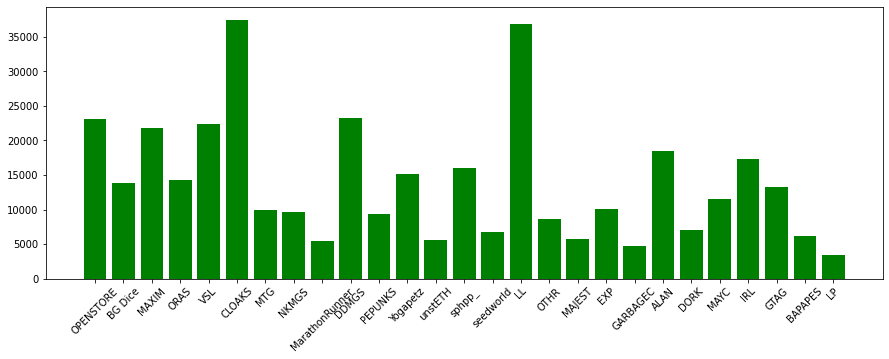

In [106]:

plt.figure(figsize=(15,5))
plt.bar(df_top_nfts['Transfer.Currency.Symbol'], df_top_nfts['count'], color='green')
plt.xticks(rotation=45)
plt.show() 